In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
new_file = 'Week_1_challenge/data/Week1_challenge_data_source.csv'
df2 = pd.read_csv(new_file)

In [9]:
df2.head(100)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,04/04/2019 12:01,770.0,25/04/2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311450e+19,09/04/2019 13:04,235.0,25/04/2019 08:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311450e+19,09/04/2019 17:42,1.0,25/04/2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311450e+19,10/04/2019 00:31,486.0,25/04/2019 07:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311450e+19,12/04/2019 20:10,565.0,25/04/2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.311450e+19,22/04/2019 07:38,804.0,25/04/2019 00:01,199.0,231780.0,2.082020e+14,3.361513e+10,3.520030e+13,L73684B,...,7438887.0,13154981.0,753238.0,9887128.0,124180544.0,14967821.0,350039548.0,14932623.0,53052136.0,139043208.0
96,1.311450e+19,22/04/2019 07:54,676.0,25/04/2019 00:01,176.0,230839.0,2.082010e+14,3.366495e+10,8.636750e+13,D73608B,...,3334865.0,14454366.0,17917894.0,1530332.0,293492651.0,1362536.0,495376623.0,11684759.0,30713366.0,329159454.0
97,7.349880e+18,22/04/2019 08:00,810.0,25/04/2019 02:22,294.0,238915.0,2.082010e+14,3.366403e+10,3.586110e+13,D73605A,...,23039020.0,21457678.0,1114842.0,13958301.0,516508263.0,8432981.0,624397048.0,9207067.0,57680454.0,546747900.0
98,1.311450e+19,22/04/2019 08:15,473.0,25/04/2019 02:55,731.0,239954.0,2.082010e+14,3.366875e+10,3.533250e+13,L76864A,...,14851113.0,1312259.0,11225027.0,15097330.0,522050751.0,1138947.0,281699270.0,3082007.0,21749419.0,549470626.0


In [10]:
df2.shape[0], df2.shape[1]

(150001, 55)

In [11]:
df2.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [13]:
import collections 

def handset_manufacturer(df):
    # 
    manufacturer_list = df['Handset Manufacturer'].tolist()
    occurence =  collections.Counter(manufacturer_list)
    #
    top_mobiles = pd.DataFrame.from_dict(occurence, orient ='index').reset_index()
    return top_mobiles.sort_values(0, ascending = False)

print()
handset_manufacturer(df2)

,index,0
3,Apple,59565
0,Samsung,40839
2,Huawei,34423
1,undefined,8987
25,Sony Mobile Communications Ab,980
...,...,...
137,Pt. Arga Mas Lestari,1
33,Shenzhen Chainway Information Technology Co Ltd,1
140,Vastking Technology (Hk) Limited,1
141,Mobiwire Sas,1


In [14]:
def handset_type(df):
    # 
    manufacturer_list = df['Handset Type'].tolist()
    occurence =  collections.Counter(manufacturer_list)
    #
    top_mobiles = pd.DataFrame.from_dict(occurence, orient ='index').reset_index()
    return top_mobiles.sort_values(0, ascending = False)

handset_type(df2)

,index,0
19,Huawei B528S-23A,19752
11,Apple iPhone 6S (A1688),9419
29,Apple iPhone 6 (A1586),9023
3,undefined,8987
25,Apple iPhone 7 (A1778),6326
...,...,...
903,Tct Mobile Suzho. Alcatel One Touch Y580D,1
904,Shenzhen Fortune. M-Ppas6,1
905,Wiko Global Sasu Wiko Ridge 4G,1
906,Hongkong Ipro Te. Ipro I9350 I9400 S3 Wave 3.5...,1


In [15]:
df2['Bearer Id'].unique()

array([1.31145e+19, 1.30424e+19, 7.27783e+18, 7.34988e+18, 1.26821e+19,
       6.91754e+18,         nan, 1.31865e+19, 7.42194e+18, 7.56606e+18])

In [16]:
df2.sort_values(by = ['Handset Type'],
        ascending=[True]).head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
22915,1.304240e+19,24/04/2019 20:40,420.0,25/04/2019 00:01,627.0,12063.0,2.082020e+14,3.377002e+10,3.523530e+13,T73680B,...,17374335.0,6877932.0,7988067.0,12427656.0,600724410.0,16082125.0,75565047.0,3496126.0,43306267.0,632017382.0
24538,6.917540e+18,24/04/2019 20:59,908.0,25/04/2019 01:58,147.0,17944.0,2.082100e+14,3.366728e+10,3.527410e+13,U11850B,...,2751984.0,15442233.0,11115039.0,15905321.0,808982512.0,10063015.0,526409751.0,7304072.0,49380109.0,829391055.0
83394,6.917540e+18,27/04/2019 10:27,402.0,28/04/2019 00:34,169.0,50819.0,2.082000e+14,3.364106e+10,3.574820e+13,G14038A,...,22050742.0,16395992.0,17912540.0,186123.0,758495114.0,12779284.0,469053998.0,11369112.0,43136379.0,812493662.0
98614,1.304240e+19,27/04/2019 17:10,126.0,28/04/2019 01:36,683.0,30359.0,2.082010e+14,3.362357e+10,3.580700e+13,L74554A,...,5958109.0,10880189.0,12021110.0,20510754.0,186180827.0,365321.0,427912779.0,3830423.0,38909548.0,214380242.0
24450,1.304240e+19,24/04/2019 20:58,423.0,25/04/2019 00:01,89.0,10993.0,2.082000e+14,3.367833e+10,3.580710e+13,D73548C,...,17339896.0,4941266.0,6489989.0,5126767.0,70999119.0,1692337.0,184245388.0,5520899.0,17641491.0,104992008.0


In [17]:
def aggregate_per_id(df):

    columns_to_show = ['Dur. (ms)', 'Total UL (Bytes)', 
                   'Total DL (Bytes)']

    return df.groupby(['Bearer Id'])[columns_to_show].agg([np.mean, np.min, 
                                            np.max])

aggregate_per_id(df2)

Dur. (ms)                      Total UL (Bytes)              \
                       mean      amin       amax             mean        amin   
Bearer Id                                                                       
6.917540e+18   59200.758240    7146.0   355758.0     4.130933e+07   5921981.0   
7.277830e+18   75667.617420    7284.0  1328732.0     4.125749e+07   5461287.0   
7.349880e+18  133635.315821    8949.0  1573420.0     4.108827e+07   2866892.0   
7.421940e+18   67042.989691   12103.0   301616.0     4.107144e+07  10210682.0   
7.566060e+18  153399.000000  153399.0   153399.0     5.890703e+07  58907032.0   
1.268210e+19   33674.717846    7364.0   243646.0     4.096270e+07   7934749.0   
1.304240e+19   80639.069018    7142.0  1859336.0     4.108569e+07   4338786.0   
1.311450e+19  132829.813892    7697.0  1859327.0     4.105602e+07   6243519.0   
1.318650e+19   67987.000000   10954.0   255505.0     4.244523e+07  13884525.0   

                         Total DL (Bytes)                           
                    amax             mean        amin         amax  
Bearer Id                                                           
6.917540e+18  73936462.0     4.544635e+08  14194498.0  891643520.0  
7.277830e+18  77458132.0     4.547874e+08   9046209.0  899502184.0  
7.349880e+18  77157382.0     4.544351e+08   8827082.0  902969616.0  
7.421940e+18  68552172.0     4.673357e+08  64413845.0  895681761.0  
7.566060e+18  58907032.0     8.131301e+07  81313010.0   81313010.0  
1.268210e+19  71093966.0     4.684946e+08  17697045.0  889115655.0  
1.304240e+19  78331311.0     4.533535e+08   7114041.0  899212554.0  
1.311450e+19  77390291.0     4.560214e+08   9199518.0  894503152.0  
1.318650e+19  64738232.0     4.127670e+08  31181078.0  872688792.0

Handling Missing Values

In [18]:
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Telecom Data contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(df2)

The Telecom Data contains 12.5 % missing values.


In [19]:
df2.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [20]:
# drop columns with more than 30% missing values
clean_df = df2.drop(['Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 
                    'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B',
                   'Nb of sec with 6250B < Vol UL < 37500B','Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
                   'Dur. (ms).1', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)'], axis=1)
clean_df.shape

(150001, 44)

In [21]:
clean_df.isna().sum()

Bearer Id                           991
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
TCP DL Retrans. Vol (Bytes)       88146
TCP UL Retrans. Vol (Bytes)       96649
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1


In [22]:
clean_df.skew(axis = 0, skipna = True)

Bearer Id                           0.026667
Start ms                            0.000968
End ms                             -0.001163
Dur. (ms)                           3.952609
IMSI                               40.992855
MSISDN/Number                     332.155855
IMEI                                1.071470
Avg RTT DL (ms)                    62.907828
Avg RTT UL (ms)                    28.457415
Avg Bearer TP DL (kbps)             2.589437
Avg Bearer TP UL (kbps)             4.503413
TCP DL Retrans. Vol (Bytes)        15.951809
TCP UL Retrans. Vol (Bytes)        84.113393
DL TP < 50 Kbps (%)                -2.297803
50 Kbps < DL TP < 250 Kbps (%)      3.271453
250 Kbps < DL TP < 1 Mbps (%)       4.566158
DL TP > 1 Mbps (%)                  5.370351
UL TP < 10 Kbps (%)                -8.985016
10 Kbps < UL TP < 50 Kbps (%)      10.943888
50 Kbps < UL TP < 300 Kbps (%)     21.878495
UL TP > 300 Kbps (%)               36.174053
Activity Duration DL (ms)           5.872256
Activity D

In [23]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       149010 non-null  float64
 1   Start                           150000 non-null  object 
 2   Start ms                        150000 non-null  float64
 3   End                             150000 non-null  object 
 4   End ms                          150000 non-null  float64
 5   Dur. (ms)                       150000 non-null  float64
 6   IMSI                            149431 non-null  float64
 7   MSISDN/Number                   148935 non-null  float64
 8   IMEI                            149429 non-null  float64
 9   Last Location Name              148848 non-null  object 
 10  Avg RTT DL (ms)                 122172 non-null  float64
 11  Avg RTT UL (ms)                 122189 non-null  float64
 12  Avg Bearer TP DL

In [24]:
def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]

In [25]:
clean_df['Start'] = clean_df['Start'].fillna(clean_df['Start'].mode()[0])
clean_df['End'] = clean_df['End'].fillna(clean_df['End'].mode()[0])
clean_df['Last Location Name'] = clean_df['Last Location Name'].fillna(clean_df['Last Location Name'].mode()[0])
clean_df['Handset Manufacturer'] = clean_df['Handset Manufacturer'].fillna(clean_df['Handset Manufacturer'].mode()[0])
clean_df['Handset Type'] = clean_df['Handset Type'].fillna(clean_df['Handset Type'].mode()[0])

In [26]:
cleaned_df = clean_df.drop(['Start', 'End', 'Last Location Name', 'Handset Type', 'Handset Manufacturer'], axis=1)

In [27]:
from sklearn.impute import SimpleImputer
    
imputer = SimpleImputer(strategy='mean')
imputer.fit(cleaned_df)
    
X = imputer.transform(cleaned_df)
df_clean = pd.DataFrame(X, columns = cleaned_df.columns)
    
    

In [28]:
df_clean.columns

Index(['Bearer Id', 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number',
       'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)'],
      dtype='object')

In [40]:
df_clean.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.500010e+05,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082017e+14,4.188282e+10,4.847454e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.883597e+18,288.610872,288.096693,8.103735e+04,2.145201e+10,2.438731e+12,2.237359e+13,559.342620,76.529933,23971.798635,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127635e+07,2.441421e+08
min,6.917540e+18,0.000000,0.000000,7.142000e+03,2.040470e+14,3.360100e+10,4.400150e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349880e+18,250.000000,251.000000,5.744200e+04,2.082010e+14,3.365151e+10,3.546260e+13,35.000000,3.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322203e+07,2.431072e+08
50%,7.349880e+18,499.000000,500.000000,8.639900e+04,2.082020e+14,3.366380e+10,3.572240e+13,54.000000,7.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114324e+07,4.558409e+08
75%,1.304240e+19,749.000000,750.000000,1.324300e+05,2.082020e+14,3.368473e+10,8.611970e+13,109.795706,17.662883,19710.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657051e+08
max,1.318650e+19,999.000000,999.000000,1.859336e+06,2.140740e+14,8.823970e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


<AxesSubplot:ylabel='Google UL (Bytes)'>

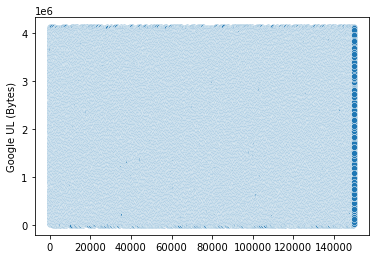

In [51]:
sns.scatterplot(x= df_clean.index, y = df_clean['Google UL (Bytes)'])

<AxesSubplot:ylabel='Avg RTT DL (ms)'>

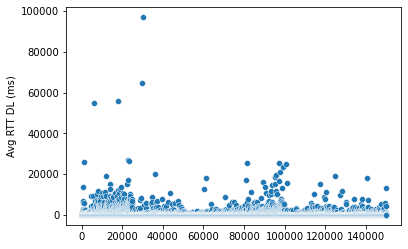

In [45]:
sns.scatterplot(x= df_clean.index, y = df_clean['Avg RTT DL (ms)'])

<AxesSubplot:ylabel='Avg RTT UL (ms)'>

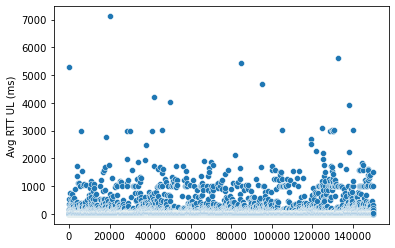

In [52]:
sns.scatterplot(x= df_clean.index, y = df_clean['Avg RTT UL (ms)'])

<AxesSubplot:xlabel='Total UL (Bytes)', ylabel='Count'>

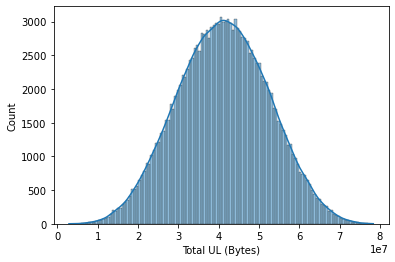

In [70]:
sns.histplot(data = df_clean, x = df_clean['Total UL (Bytes)'], kde=True)

<AxesSubplot:ylabel='Total UL (Bytes)'>

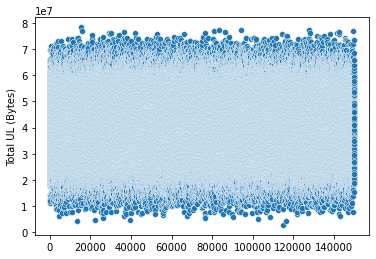

In [81]:
sns.scatterplot(x= df_clean.index, y = df_clean['Total UL (Bytes)'])
#Some certain kind of linearity in the data

<AxesSubplot:xlabel='Total DL (Bytes)', ylabel='Count'>

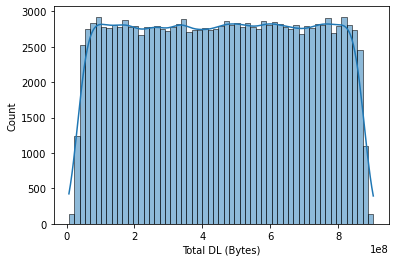

In [71]:
sns.histplot(data = df_clean, x = df_clean['Total DL (Bytes)'], kde=True)

<AxesSubplot:ylabel='Total DL (Bytes)'>

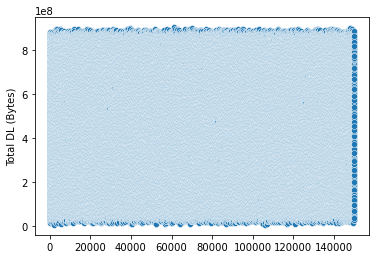

In [82]:
sns.scatterplot(x= df_clean.index, y = df_clean['Total DL (Bytes)'])

<AxesSubplot:xlabel='Avg RTT UL (ms)', ylabel='Count'>

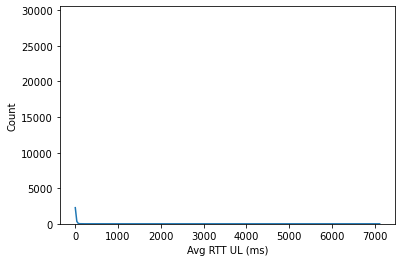

In [83]:
sns.histplot(data = df_clean, x = df_clean['Avg RTT UL (ms)'], kde=True)

<AxesSubplot:xlabel='Total DL (Bytes)', ylabel='Count'>

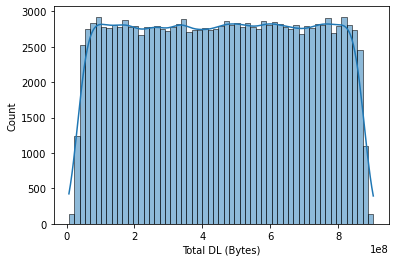

In [72]:
sns.histplot(data = df_clean, x = df_clean['Total DL (Bytes)'], kde=True)

<AxesSubplot:xlabel='Total DL (Bytes)', ylabel='Count'>

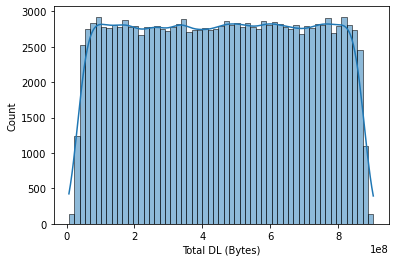

In [73]:
sns.histplot(data = df_clean, x = df_clean['Total DL (Bytes)'], kde=True)

<AxesSubplot:xlabel='Google UL (Bytes)', ylabel='Count'>

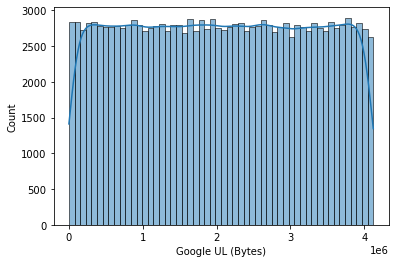

In [74]:
sns.histplot(data = df_clean, x = df_clean['Google UL (Bytes)'], kde=True)

<AxesSubplot:xlabel='Social Media UL (Bytes)', ylabel='Count'>

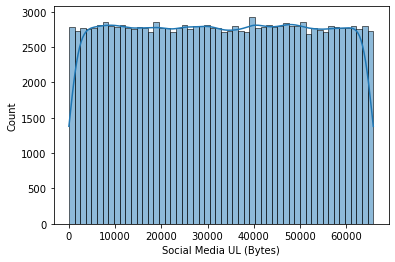

In [75]:
sns.histplot(data = df_clean, x = df_clean['Social Media UL (Bytes)'], kde=True)

<AxesSubplot:xlabel='Social Media DL (Bytes)', ylabel='Count'>

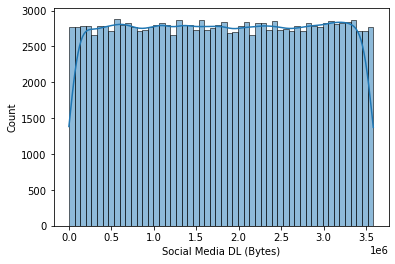

In [76]:
sns.histplot(data = df_clean, x = df_clean['Social Media DL (Bytes)'], kde=True)

<AxesSubplot:xlabel='Gaming DL (Bytes)', ylabel='Count'>

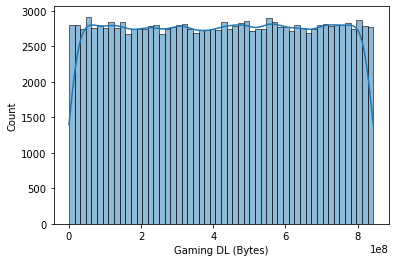

In [77]:
sns.histplot(data = df_clean, x = df_clean['Gaming DL (Bytes)'], kde=True)

<AxesSubplot:xlabel='Netflix DL (Bytes)', ylabel='Count'>

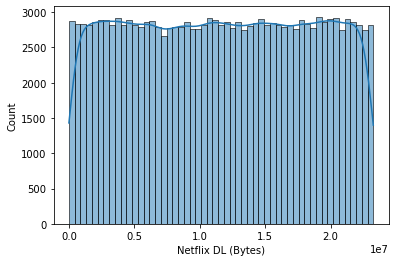

In [84]:
sns.histplot(data = df_clean, x = df_clean['Netflix DL (Bytes)'], kde=True)

<AxesSubplot:xlabel='Netflix UL (Bytes)', ylabel='Count'>

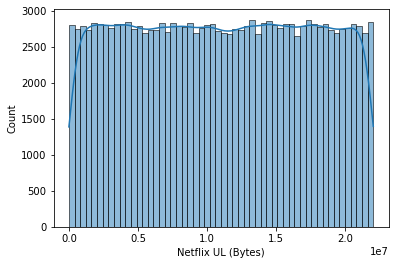

In [85]:
sns.histplot(data = df_clean, x = df_clean['Netflix UL (Bytes)'], kde=True)

<AxesSubplot:ylabel='Activity Duration DL (ms)'>

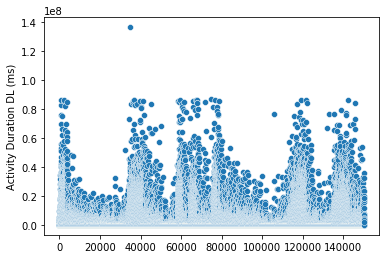

In [89]:
sns.scatterplot(x= df_clean.index, y = df_clean['Activity Duration DL (ms)'])

<AxesSubplot:ylabel='Activity Duration UL (ms)'>

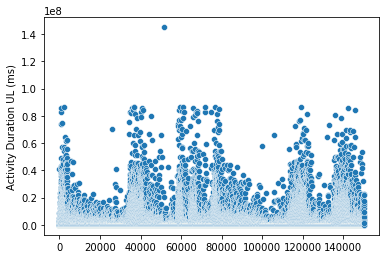

In [90]:
sns.scatterplot(x= df_clean.index, y = df_clean['Activity Duration UL (ms)'])

<AxesSubplot:xlabel='Activity Duration UL (ms)', ylabel='Count'>

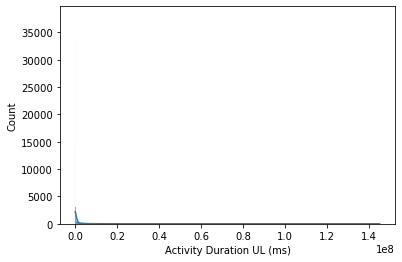

In [88]:
sns.histplot(data = df_clean, x = df_clean['Activity Duration UL (ms)'], kde=True)

<AxesSubplot:xlabel='Other DL (Bytes)', ylabel='Count'>

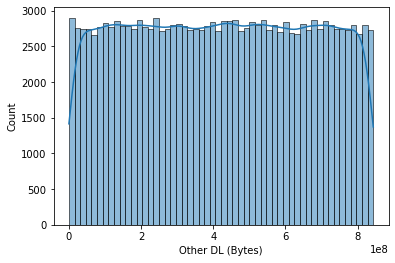

In [91]:
sns.histplot(data = df_clean, x = df_clean['Other DL (Bytes)'], kde=True)

<AxesSubplot:xlabel='Gaming UL (Bytes)', ylabel='Count'>

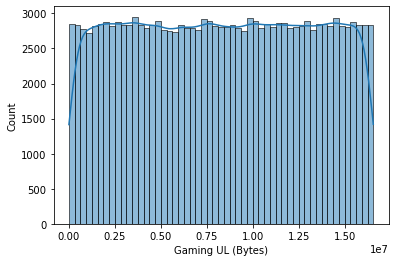

In [92]:
sns.histplot(data = df_clean, x = df_clean['Gaming UL (Bytes)'], kde=True)

Bivariate Analysis

<AxesSubplot:xlabel='Social Media UL (Bytes)', ylabel='Total DL (Bytes)'>

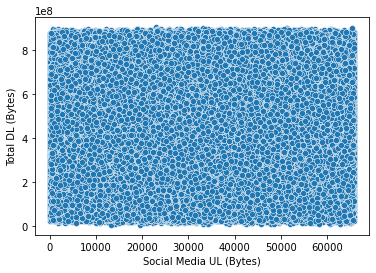

In [101]:
sns.scatterplot(x = df_clean['Social Media UL (Bytes)'], y=df_clean['Total DL (Bytes)'])

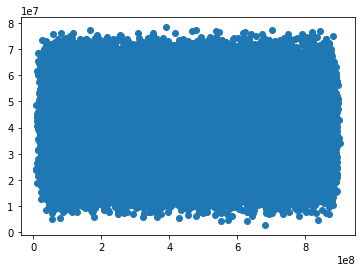

In [102]:
plt.scatter(df_clean['Total DL (Bytes)'], df_clean['Total UL (Bytes)'])

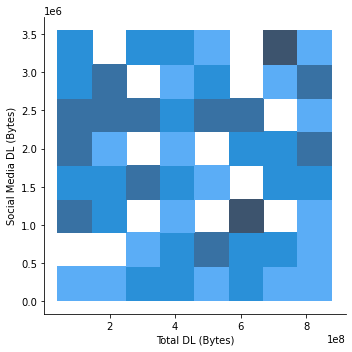

In [114]:
sns.displot(df_clean, x=df_clean.loc[0:100, 'Total DL (Bytes)'], y=df_clean.loc[0:100, 'Social Media DL (Bytes)'])  

In [136]:
df_clean['Decile_rank'] = pd.qcut(df_clean['Dur. (ms)'], 5,
                            labels = False)

In [137]:
df_clean['Decile_rank'].unique()

array([4, 3, 2, 1, 0], dtype=int64)

In [211]:
def total_data_per_class(df):
    
    # Sum of total data for first class
    rank_first = df[df['Decile_rank'] == 0]
    total_data_first = sum(rank_first['Total DL (Bytes)'].tolist()) 
    + sum(rank_first['Total UL (Bytes)'].tolist())
    
    # Sum of total data for second class
    rank_second = df[df['Decile_rank'] == 1]
    total_data_second = sum(rank_second['Total DL (Bytes)'].tolist()) 
    + sum(rank_second['Total UL (Bytes)'].tolist())
    
    # Sum of total data for third class
    rank_third = df[df['Decile_rank'] == 3]
    total_data_third = sum(rank_third['Total DL (Bytes)'].tolist()) 
    + sum(rank_third['Total UL (Bytes)'].tolist())
    
    # Sum of total data for fourth class
    rank_fourth = df[df['Decile_rank'] == 4]
    total_data_fourth = sum(rank_fourth['Total DL (Bytes)'].tolist()) 
    + sum(rank_fourth['Total UL (Bytes)'].tolist())
    
    # Sum of total data for the fifth class
    rank_fifth = df[df['Decile_rank'] == 1]
    total_data_fifth = sum(rank_fifth['Total DL (Bytes)'].tolist()) 
    + sum(rank_fifth['Total UL (Bytes)'].tolist())
    
    columns = [total_data_first, total_data_second, total_data_third, total_data_fourth, total_data_fifth]
    rows = ['1', '2', '3', '4', '5']
    
    return pd.DataFrame({'Class':rows, 'Total Data':columns})

In [212]:
total_data_per_class(df_clean)

,Class,Total Data
0,1,1.364976e+13
1,2,2.165754e+13
2,3,1.362117e+13
3,4,1.368615e+13
4,5,2.165754e+13


In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude")

In [220]:
corr_data = df_clean.loc[0:, 'Social Media UL (Bytes)':'Other UL (Bytes)']

In [225]:
def correlation_matrix(df):
    correlation = []
    # Calculate correlation of each column in the dataset against other columns 
    corr_matrix = df.corr()
    for column in corr_matrix:
        corr = corr_matrix[column].sort_values(ascending = False)
        correlation.append(corr)
        
    return pd.DataFrame(correlation)

correlation_matrix(corr_data)

,Social Media UL (Bytes),Email DL (Bytes),Google DL (Bytes),Google UL (Bytes),Other UL (Bytes),Gaming UL (Bytes),Gaming DL (Bytes),Netflix DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix UL (Bytes),Other DL (Bytes)
Social Media UL (Bytes),1.000000,0.004823,0.003542,0.001085,0.000971,0.000844,0.000210,-0.000772,-0.001427,-0.001786,-0.002368,-0.002493,-0.003850
Google DL (Bytes),0.003542,-0.000039,1.000000,-0.000103,-0.000882,-0.001429,-0.001421,0.000548,0.000742,0.001760,0.000638,-0.001569,-0.002557
Google UL (Bytes),0.001085,-0.001157,-0.000103,1.000000,-0.002219,-0.002516,0.001140,-0.001288,-0.002050,0.001122,0.001670,-0.004073,0.002097
Email DL (Bytes),0.004823,1.000000,-0.000039,-0.001157,0.004675,-0.004335,0.000050,0.001351,0.002553,0.001679,-0.004305,-0.000016,-0.000444
Email UL (Bytes),-0.001427,0.002553,0.000742,-0.002050,0.000081,0.005000,-0.002519,-0.000011,1.000000,-0.000320,-0.006834,0.000532,-0.003805
Youtube DL (Bytes),-0.001786,0.001679,0.001760,0.001122,-0.004830,-0.001893,-0.001861,0.001202,-0.000320,1.000000,0.002433,0.001746,0.002042
Youtube UL (Bytes),-0.002368,-0.004305,0.000638,0.001670,-0.001393,0.000898,-0.002382,0.000423,-0.006834,0.002433,1.000000,0.002477,0.002296
Netflix DL (Bytes),-0.000772,0.001351,0.000548,-0.001288,-0.002588,-0.000633,-0.003201,1.000000,-0.000011,0.001202,0.000423,0.001065,-0.006000
Netflix UL (Bytes),-0.002493,-0.000016,-0.001569,-0.004073,-0.003447,-0.004015,-0.001051,0.001065,0.000532,0.001746,0.002477,1.000000,-0.006691
Gaming DL (Bytes),0.000210,0.000050,-0.001421,0.001140,-0.001131,0.001162,1.000000,-0.003201,-0.002519,-0.001861,-0.002382,-0.001051,-0.002591


In [122]:
df_clean['Decile_rank'].unique()

array([4, 3, 2, 1, 0], dtype=int64)

In [127]:
df_clean['Decile_rank'].value_counts(normalize = True)

1    0.318018
0    0.200005
4    0.199999
3    0.199992
2    0.081986
Name: Decile_rank, dtype: float64

In [109]:
sns.boxplot(x=df_clean['Social Media DL (Bytes)'], y=df_clean['Total DL (Bytes)'])

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000019C2E862550> (for post_execute):


KeyboardInterrupt: 

KeyboardInterrupt: 

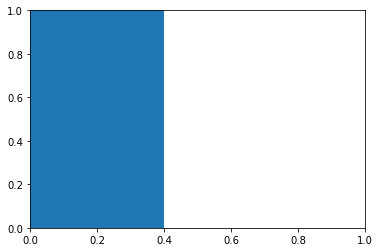

In [53]:
plt.bar(df_clean['Avg RTT DL (ms)'], height = 20)

In [ ]:
def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]


def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]

df_clean['diag_1'] = fix_missing_ffill(df_clean, 'diag_1')
df_clean['diag_2'] = fix_missing_ffill(df_clean, 'diag_2')
df_clean['diag_3'] = fix_missing_ffill(df_clean, 'diag_3')

# fill 'race' column with mode 
df_clean['race'] = df_clean['race'].fillna(df_clean['race'].mode()[0])

In [ ]:
def correlation(df):
    correlation = []
    # Calculate correlation of each column in the dataset against other columns 
    corr_matrix = df.corr()
    for column in corr_matrix:
        corr = corr_matrix[column].sort_values(ascending = False)
        correlation.append(corr)
    return correlation

correlation(df)

In [ ]:
from pandas.plotting import scatter_matrix

columns = ["Avg RTT DL (ms)", "Activity Duration UL (ms)"]

scatter_matrix(df[columns], figsize=(12, 8))

In [ ]:
df.isnull().count()

In [ ]:
df['Avg Bearer TP UL (kbps)'].max()